## **AI Assignment 2.**

## **Penguin Classification Analysis.**

Name : Prateek Bajpai

Class : Data Science & Big Data Analytics

In [1]:
# Importing libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset.

from google.colab import files
uploaded = files.upload()

Saving penguins_size.csv to penguins_size.csv


In [3]:
# Reading the dataset

df = pd.read_csv('penguins_size.csv')

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### **Performing Data Cleaning & Preprocessing.**

In [4]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
# Total percentage of missing data

missing_data = df.isnull().sum()

total_percentage = (missing_data.sum()/df.shape[0]) * 100

print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 5.23%


In [6]:
# Percentage of missing data per category

total = df.isnull().sum().sort_values(ascending=False)

percent_total = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100

missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])

missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
sex,10,2.906977
culmen_length_mm,2,0.581395
culmen_depth_mm,2,0.581395
flipper_length_mm,2,0.581395
body_mass_g,2,0.581395


In [7]:
# Replace missing values using fillna() function

# For numerical columns, replace with median

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())


In [8]:
# For categorical columns, replace with mode (most common value)

categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])


In [9]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Text(0.5, 1.0, 'Boxplot of body_mass ')

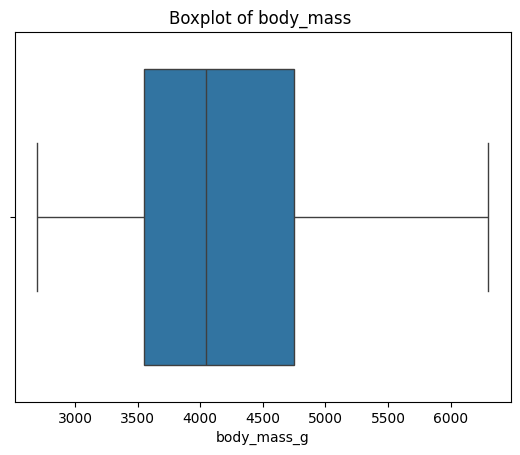

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df,x=df["body_mass_g"])
plt.title("Boxplot of body_mass ")

## **Univariate Analysis.**

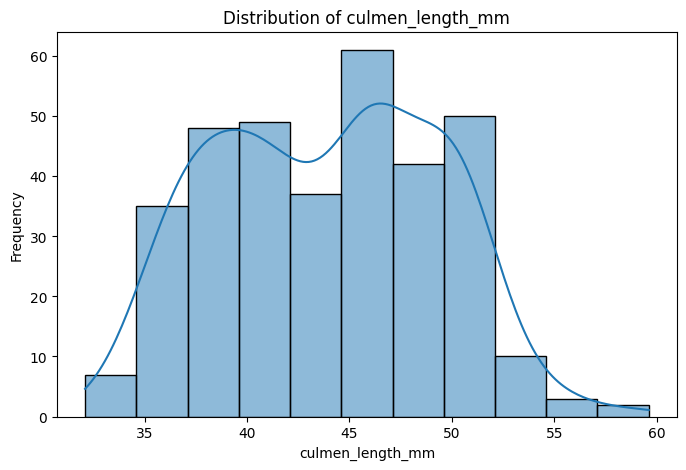

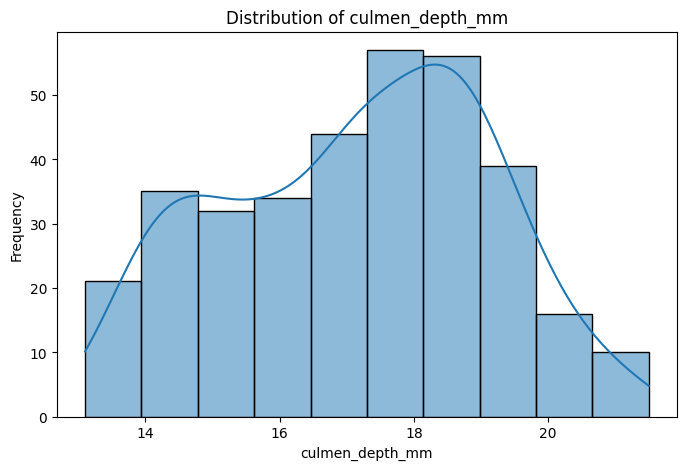

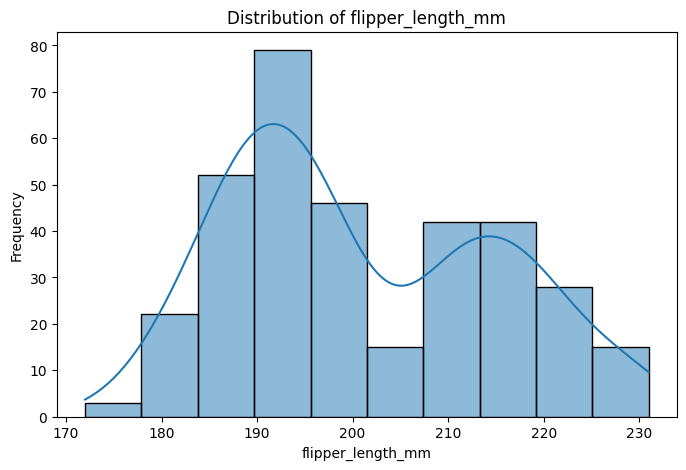

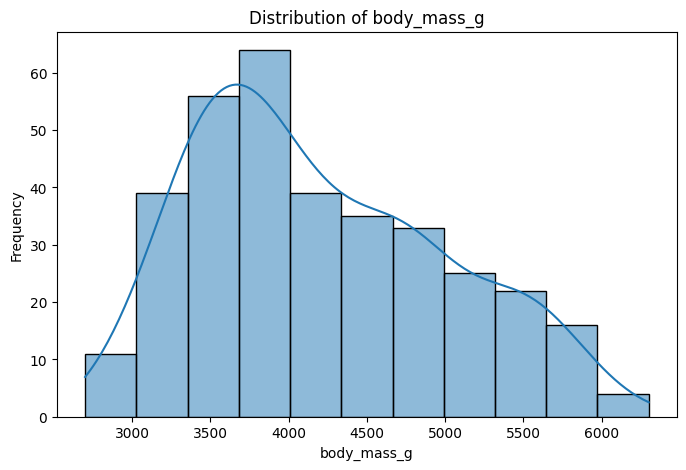

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis
def univariate_analysis(data, column):
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Perform univariate analysis for each numerical column
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for column in numerical_columns:
    univariate_analysis(df, column)


## **BiVariate Analysis.**

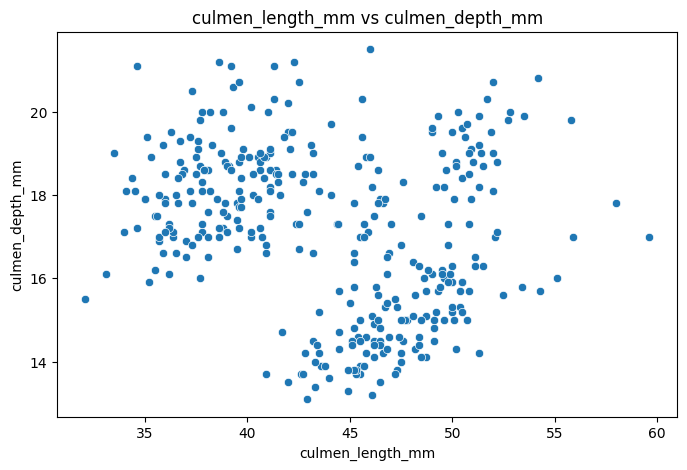

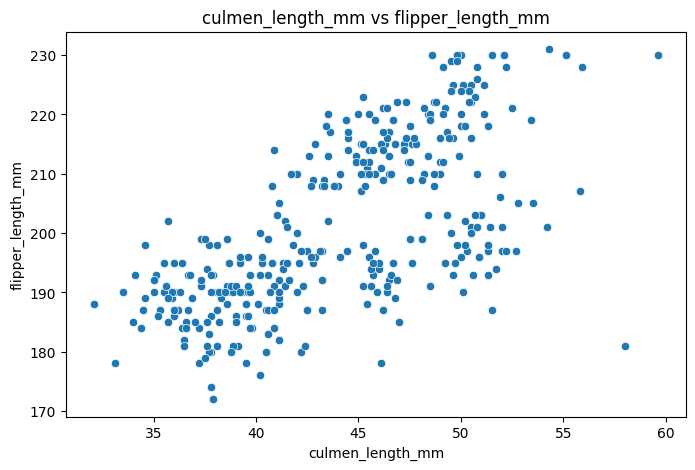

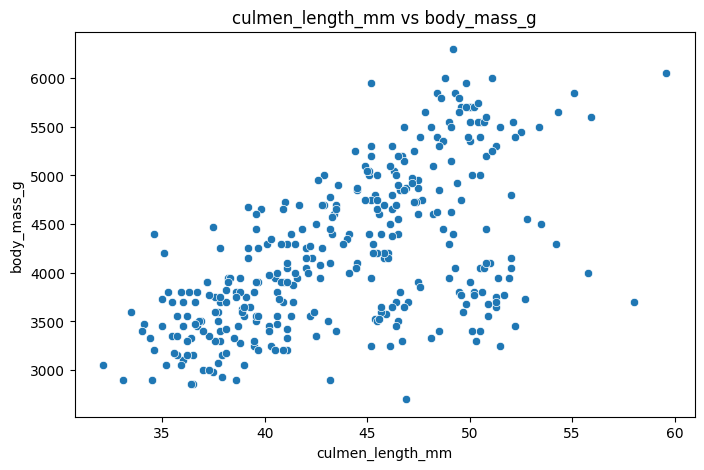

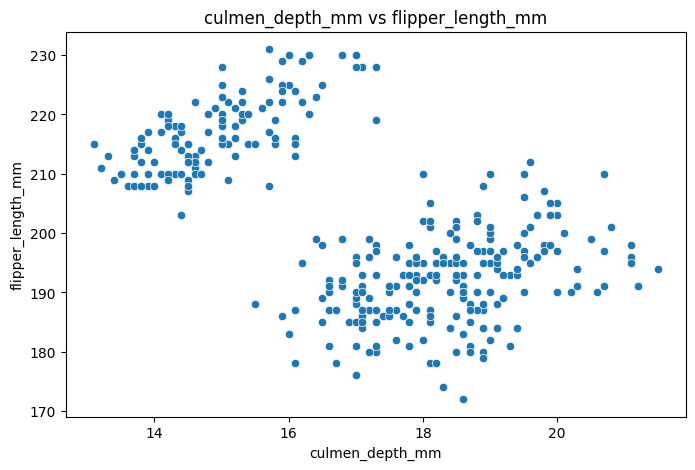

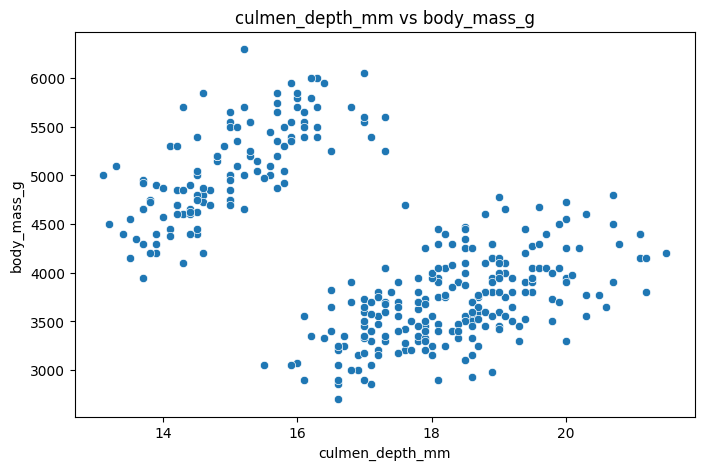

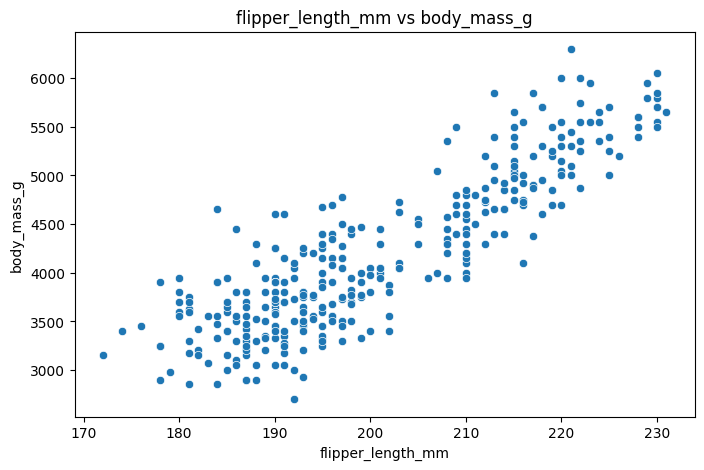

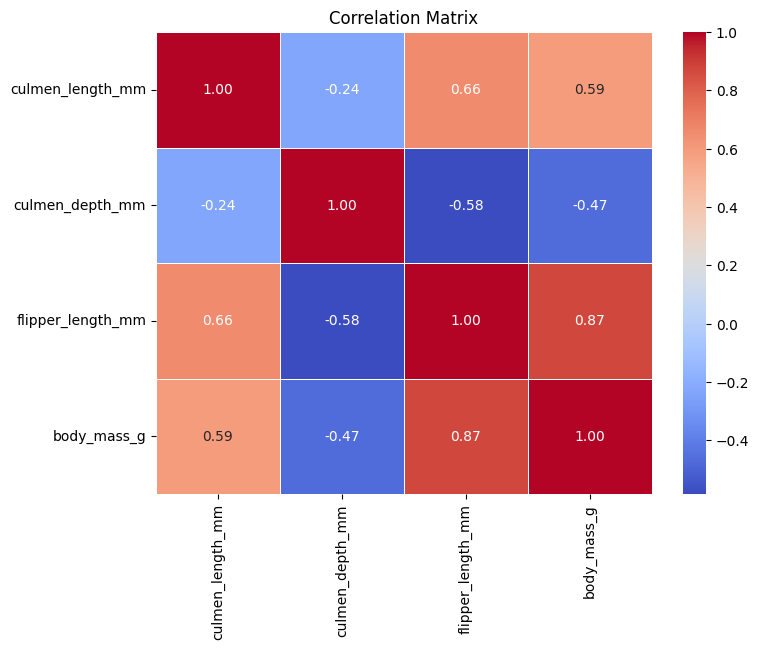

In [13]:
# Bivariate Analysis
def bivariate_analysis(data, x_column, y_column):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=x_column, y=y_column)
    plt.title(f"{x_column} vs {y_column}")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Perform bivariate analysis for pairs of numerical columns
for i in range(len(numerical_columns)):
    for j in range(i+1, len(numerical_columns)):
        bivariate_analysis(df, numerical_columns[i], numerical_columns[j])

# Calculate and visualize correlation matrix
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


## **Multi-Variate Analysis.**

<Figure size 1000x800 with 0 Axes>

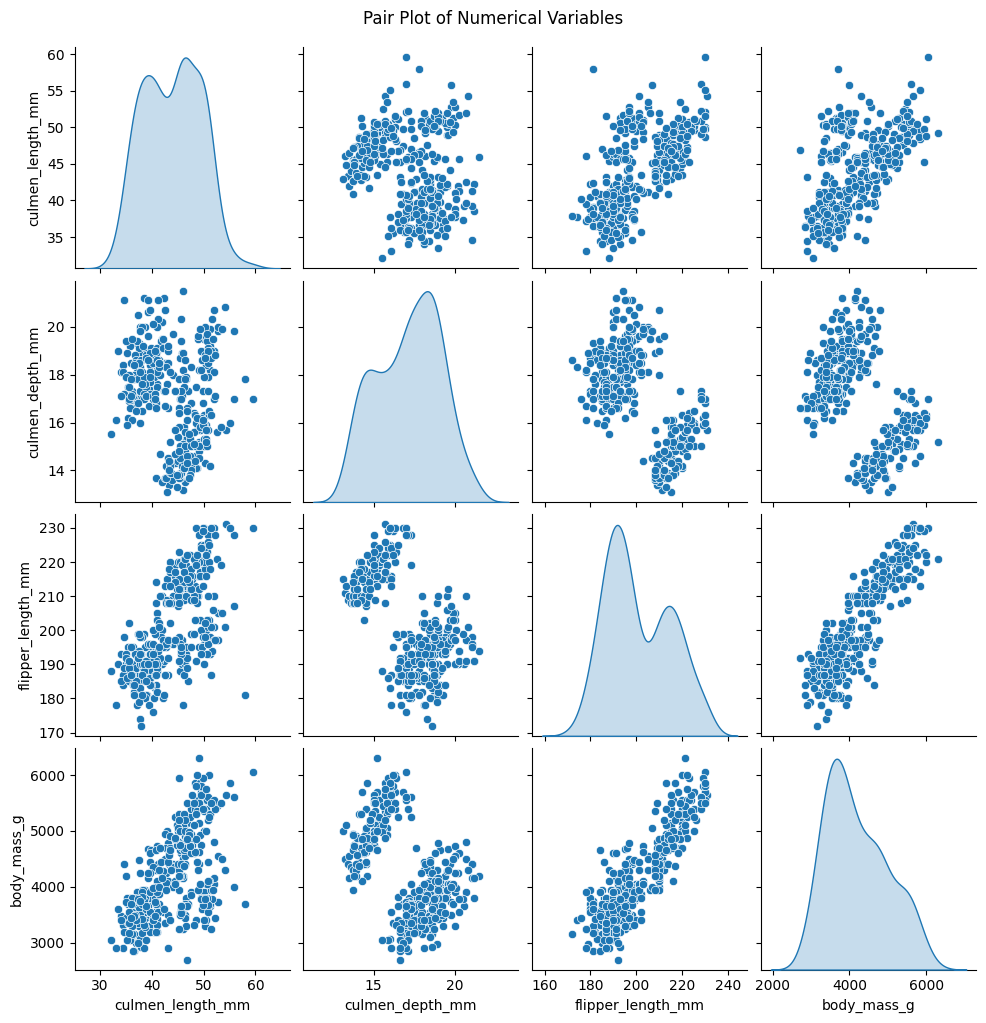

In [14]:
# Multivariate Analysis
plt.figure(figsize=(10, 8))
sns.pairplot(df[numerical_columns], diag_kind='kde')
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()


## **Performing Encoding on Categorical Columns.**

In [15]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_columns)

# Perform encoding using LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated dataset
print("\nUpdated Dataset Preview:")
print(df.head())



Categorical Columns:
Index(['species', 'island', 'sex'], dtype='object')

Updated Dataset Preview:
   species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0        0       2             39.10             18.7              181.0   
1        0       2             39.50             17.4              186.0   
2        0       2             40.30             18.0              195.0   
3        0       2             44.45             17.3              197.0   
4        0       2             36.70             19.3              193.0   

   body_mass_g  sex  
0       3750.0    2  
1       3800.0    1  
2       3250.0    1  
3       4050.0    2  
4       3450.0    1  


In [16]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,2
1,0,2,39.50,17.4,186.0,3800.0,1
2,0,2,40.30,18.0,195.0,3250.0,1
3,0,2,44.45,17.3,197.0,4050.0,2
4,0,2,36.70,19.3,193.0,3450.0,1


In [17]:
df.species.unique()

array([0, 1, 2])

In [18]:
df.island.unique()

array([2, 0, 1])

## **Split the data into Dependent and Independent variables.**

In [19]:
# Define the target variable
target_column = 'species'

# Split the dataset into dependent and independent variables

X = df.drop(columns=[target_column])  # Independent variables (features)
y = df[target_column]  # Dependent variable (target)

# Display the shape of the independent and dependent variables
print("\nShape of Independent Variables (Features):", X.shape)
print("Shape of Dependent Variable (Target):", y.shape)


Shape of Independent Variables (Features): (344, 6)
Shape of Dependent Variable (Target): (344,)


## **Scaling the data.**

In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the scaled features
print("\nScaled Features (First 5 rows):")
print(X_scaled_df.head())



Scaled Features (First 5 rows):
     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  1.844076         -0.887622         0.787289          -1.420541   
1  1.844076         -0.814037         0.126114          -1.063485   
2  1.844076         -0.666866         0.431272          -0.420786   
3  1.844076          0.096581         0.075255          -0.277964   
4  1.844076         -1.329133         1.092447          -0.563608   

   body_mass_g       sex  
0    -0.564625  0.960230  
1    -0.502010 -1.017729  
2    -1.190773 -1.017729  
3    -0.188936  0.960230  
4    -0.940314 -1.017729  


## **Training, Testing, Modelling and Evaluating the metrices.**

In [21]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Choose a machine learning model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=40)

# Train the model on the training data
model.fit(X_train, y_train)

# Test the trained model on the testing data
y_pred = model.predict(X_test)

# Measure the performance using evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.9710144927536232

Confusion Matrix:
[[33  1  0]
 [ 1 11  0]
 [ 0  0 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.92      0.92      0.92        12
           2       1.00      1.00      1.00        23

    accuracy                           0.97        69
   macro avg       0.96      0.96      0.96        69
weighted avg       0.97      0.97      0.97        69



## **Comparing Performance Evaluation of Models.**

In [22]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [48]:
# list of models
models = [SVC(), KNeighborsClassifier(), RandomForestClassifier()]

In [46]:
def compare_models_train_test():

  for model in models:

    # training the model
    model.fit(X_train, y_train)

    # evaluating the model
    test_data_prediction = model.predict(X_test)

    accuracy = accuracy_score(y_test, test_data_prediction)

    print('Accuracy score of the ', model, ' = ', accuracy)

    conf_matrix = confusion_matrix(y_test, test_data_prediction)
    class_report = classification_report(y_test, test_data_prediction)
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)


In [47]:
compare_models_train_test()

Accuracy score of the  SVC()  =  0.7971014492753623

Confusion Matrix:
[[32  0  2]
 [12  0  0]
 [ 0  0 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        34
           1       0.00      0.00      0.00        12
           2       0.92      1.00      0.96        23

    accuracy                           0.80        69
   macro avg       0.55      0.65      0.59        69
weighted avg       0.67      0.80      0.72        69

Accuracy score of the  KNeighborsClassifier()  =  0.782608695652174

Confusion Matrix:
[[30  4  0]
 [ 8  4  0]
 [ 3  0 20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        34
           1       0.50      0.33      0.40        12
           2       1.00      0.87      0.93        23

    accuracy                           0.78        69
   macro avg       0.74      0.70      0.71        69
weighted avg 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
